In [234]:
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import re
import talib as ta
from talib import BBANDS
import yfinance as yf

In [235]:
import matplotlib.style
import matplotlib as mpl
import seaborn as sns
sns.set_style("white")

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

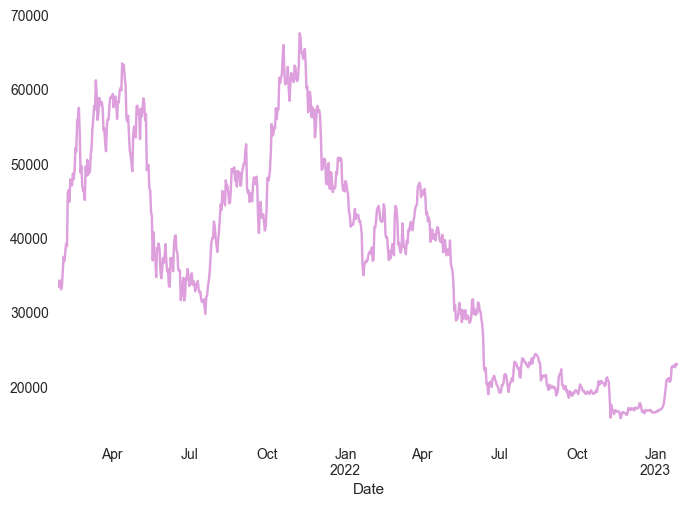

In [236]:
ticker ="BTC-USD"
datos = yf.download(ticker, period="2y", interval="1d", auto_adjust=True) #> Estamos descargando los datos de yahoo
datos["Close"].plot(color="plum") #>>>>> Gráficamos los precios de cierre en una temporalidad de 1 día

In [237]:
#### VAMOS A SACAR LA MEDIA MOVIL ###
datos["Simple Ma"] = ta.SMA(datos["Close"],10) #>>> Simple 
datos["EMA"] = ta.EMA(datos["Close"],timeperiod=20) #>>> Exponencial
datos["WMA"] = ta.WMA(datos["Close"],timeperiod=50) # >> pondera

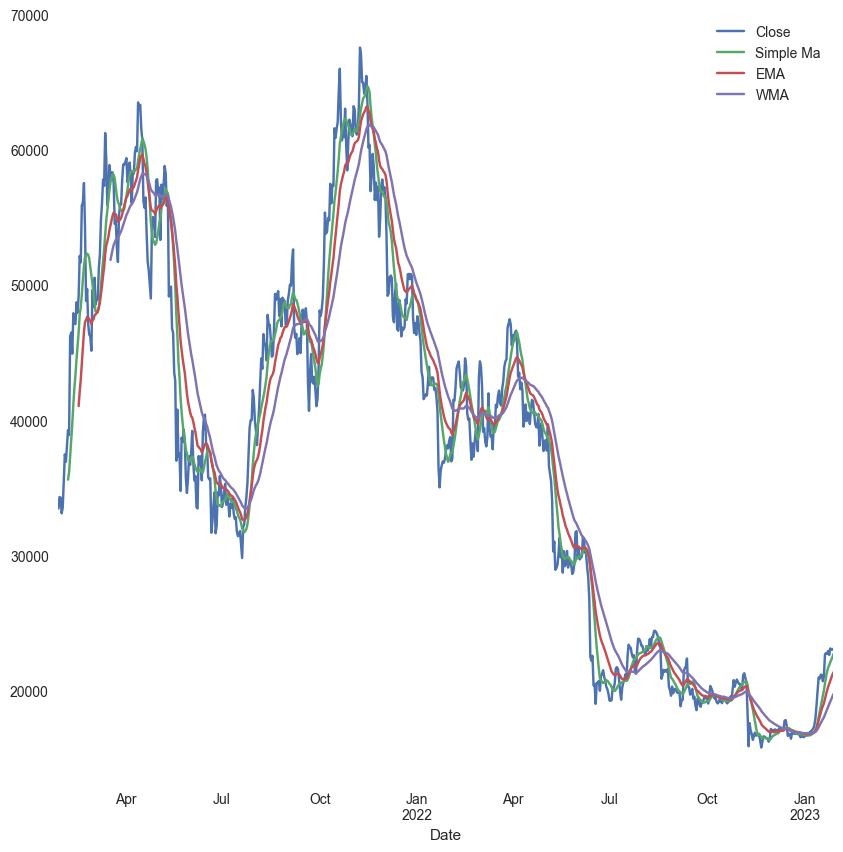

In [238]:
#### Graficamos las medias moviles
datos[["Close","Simple Ma","EMA","WMA"]].plot(figsize=(10,10))
plt.show()

In [239]:
datos["up"], datos["mid"], datos["low"] =ta.BBANDS(datos["Close"], timeperiod=25, nbdevup=2, nbdevdn=2, matype=0) #>>>> acá lo que hacemos es configurar las bandas

<AxesSubplot: xlabel='Date'>

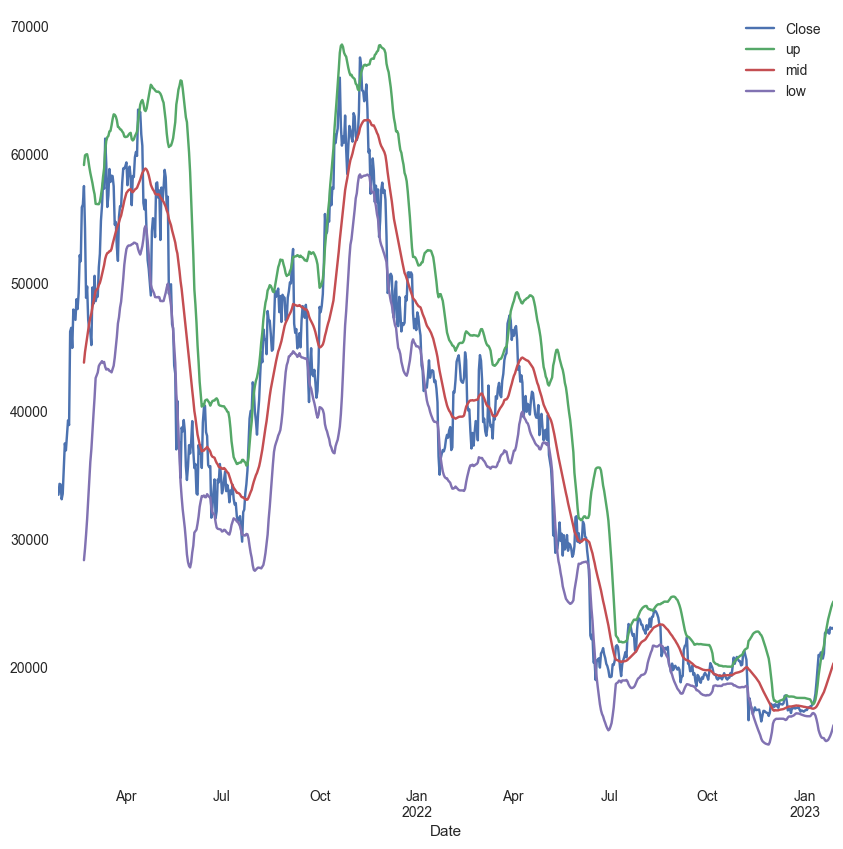

In [240]:
datos[["Close","up","mid","low"]].plot(figsize=(10,10)) #>>> Gráficamos las bandas

In [241]:
def alertaBoll(B, amplitud, alertaPercentil): ##>>>Definimos la señal
    try:
        if B > 1 and alertaPercentil < amplitud:
            alerta = "SobreCompra"
        elif B < 0 and alertaPercentil < amplitud:
            alerta = "SobreVenta"
        elif B > 1:
            alerta = "Sobre Banda Superior sin volatilidad"
        elif B < 0:
            alerta = "Debajo Banda Inferior sin Volatilidad"
        else:
            alerta = "Sin Señal"
        return alerta
    except Exception as e:
        return str(e)

In [242]:
close = datos['Close'].to_numpy()
BollBeta = bbp(close)

In [243]:
up, mid, low = BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)

In [244]:
def bbp(datos):
    up, mid, low = ta.BBANDS(datos, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    bbp = (datos - low) / (up - low)
    return bbp

In [245]:
def alertaBoll(B, amplitud, alertaPercentil):
    try:
        if B > 1 and alertaPercentil < amplitud:
            alerta = "SobreCompra"
        elif B < 0 and alertaPercentil < amplitud:
            alerta = "SobreVenta"
        elif B > 1:
            alerta = "Sobre Banda Superior sin volatilidad"
        elif B < 0:
            alerta = "Debajo Banda Inferior sin Volatilidad"
        else:
            alerta = "Sin Señal"
        return alerta
    except Exception as e:
        return str(e)

In [247]:
datos["up"] = up.tolist()
datos["MID"] = mid.tolist()
datos["DOWN"] = low.tolist()
datos["B"] = BollBeta.tolist()

<AxesSubplot: xlabel='Date'>

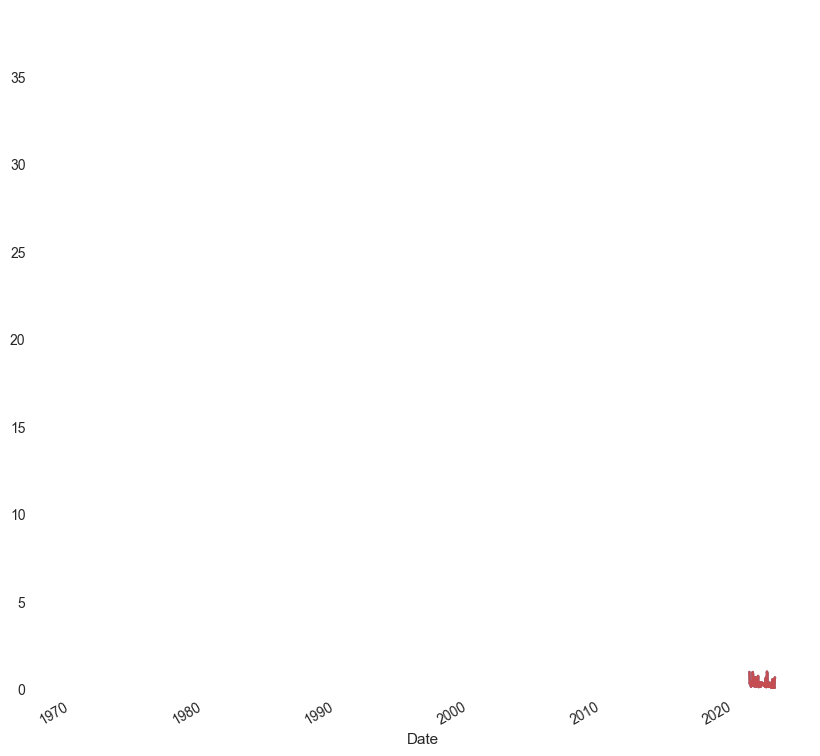

In [253]:
datos['AMPLITUD'] = datos["up"] / datos["DOWN"] - 1

datos['AMPLITUD'].plot()
datos['AMPLITUD'].hist(bins=100)

datos = datos[datos['AMPLITUD'] < 1]

datos['AMPLITUD'].plot(figsize=(10,10))


<AxesSubplot: >

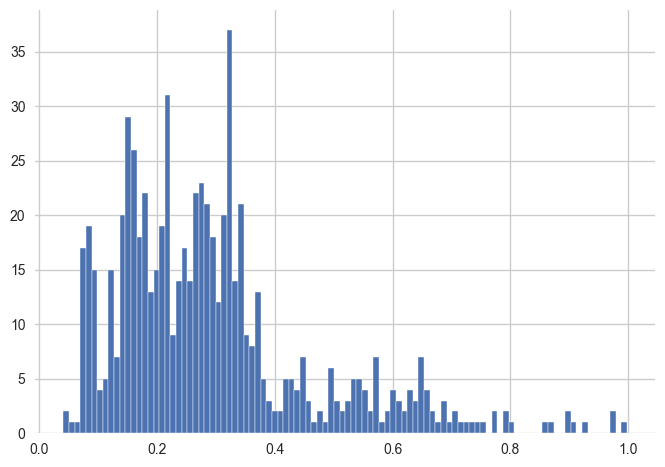

In [254]:
datos['AMPLITUD'].hist(bins=100)

In [256]:
alertaPercentil = np.percentile(datos['AMPLITUD'], 90)

datos['Alerta']  = datos.apply(lambda x: alertaBoll(x['B'], x['AMPLITUD'], alertaPercentil), axis=1)

In [258]:
datos.tail(10)

,Open,High,Low,Close,Volume,Simple Ma,EMA,WMA,up,mid,low,MID,DOWN,B,AMPLITUD,Alerta
Date,,,,,,,,,,,,,,,,
2023-01-19 00:00:00+00:00,20686.746094,21163.011719,20685.380859,21086.792969,21152848261,20012.417578,19054.615247,18018.591209,21679.440620,18079.771172,14480.101724,18079.771172,14480.101724,0.858442,0.497188,Sin Señal
2023-01-20 00:00:00+00:00,21085.373047,22692.357422,20919.126953,22676.552734,28799154319,20535.443555,19399.561674,18219.671569,22298.913584,18310.041094,14321.168603,18310.041094,14321.168603,0.988469,0.557060,Sin Señal
2023-01-21 00:00:00+00:00,22677.427734,23282.347656,22511.833984,22777.625000,32442278429,21019.716406,19721.281991,18420.237570,22849.384842,18552.459141,14255.533439,18552.459141,14255.533439,0.936811,0.602843,Sin Señal
2023-01-22 00:00:00+00:00,22777.986328,23056.730469,22387.900391,22720.416016,24746386230,21404.799219,20006.913803,18614.098150,23311.342048,18799.172891,14287.003733,18799.172891,14287.003733,0.882166,0.631647,Sin Señal
2023-01-23 00:00:00+00:00,22721.087891,23126.486328,22654.304688,22934.431641,26518700512,21707.284961,20285.725026,18811.792926,23751.712056,19050.856484,14350.000912,19050.856484,14350.000912,0.863900,0.655171,Sin Señal
2023-01-24 00:00:00+00:00,22929.626953,23134.011719,22549.744141,22636.468750,26405069715,21873.301953,20509.605380,18993.250769,24084.189199,19292.211797,14500.234394,19292.211797,14500.234394,0.799647,0.660952,Sin Señal
2023-01-25 00:00:00+00:00,22639.267578,23722.099609,22406.076172,23117.859375,30685366709,22097.008008,20758.010523,19189.146172,24435.917633,19555.026328,14674.135023,19555.026328,14674.135023,0.820780,0.665237,Sin Señal
2023-01-26 00:00:00+00:00,23108.955078,23237.078125,22911.373047,23032.777344,26357839322,22283.322461,20974.654982,19376.976903,24722.744579,19811.334219,14899.923858,19811.334219,14899.923858,0.784510,0.659253,Sin Señal
2023-01-27 00:00:00+00:00,23030.716797,23417.720703,22654.593750,23078.728516,25383335641,22475.043359,21175.042937,19561.758934,24966.779164,20066.944531,15167.109898,20066.944531,15167.109898,0.766958,0.646113,Sin Señal
